Task 1 - Titanic Survival Prediction

In [92]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
import pandas as pd

In [94]:
df = pd.read_csv("Datasets/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
df.shape

(891, 12)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


EDA and Data Preprocessing

In [97]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [99]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [100]:
pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

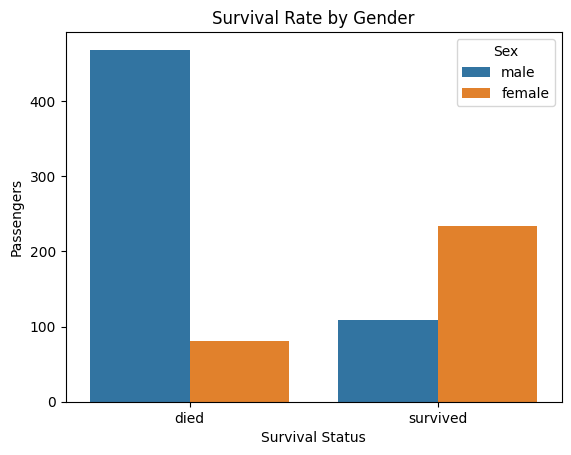

In [102]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel("Survival Status")
plt.ylabel("Passengers")
plt.xticks([0,1],['died','survived'])
plt.show()

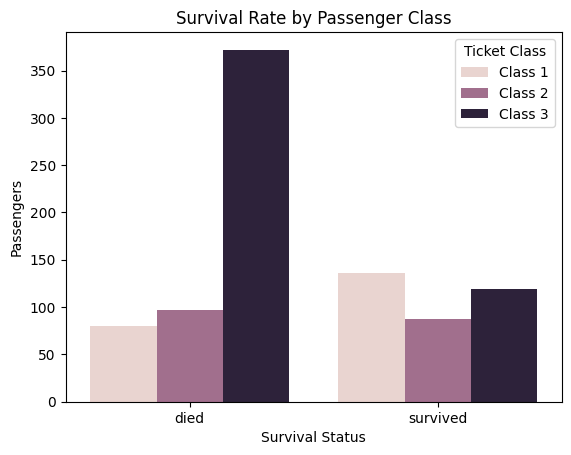

In [103]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel("Survival Status")
plt.ylabel("Passengers")
plt.xticks([0,1],['died','survived'])
plt.legend(['Class 1','Class 2','Class 3'], title = 'Ticket Class')
plt.show()

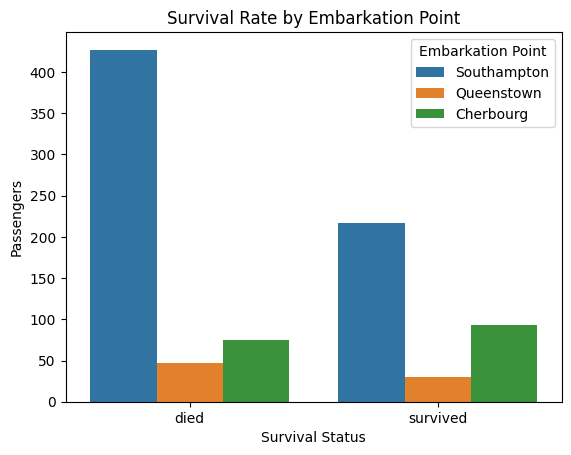

In [104]:
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Survival Rate by Embarkation Point')
plt.xlabel("Survival Status")
plt.ylabel("Passengers")
plt.xticks([0,1],['died','survived'])
plt.legend(['Southampton','Queenstown','Cherbourg'], title = 'Embarkation Point')
plt.show()

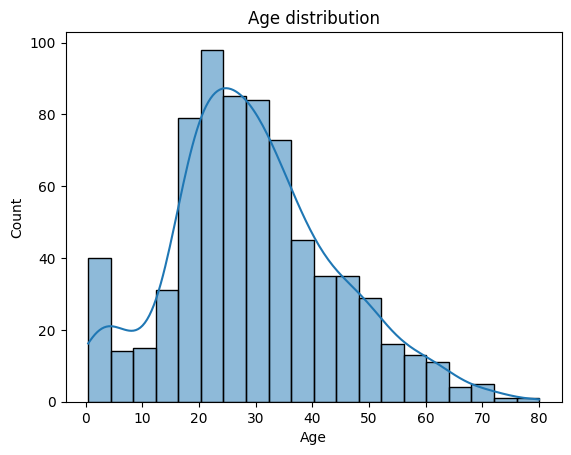

In [105]:
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age distribution')
# plt.xlabel("Survival Status")
# plt.ylabel("Passengers")
# plt.xticks([0,1],['died','survived'])
# plt.legend(['Class 1','Class 2','Class 3'], title = 'Ticket Class')
plt.show()

In [106]:
# Fill missing Age values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop the Cabin column since it has too many null values
df.drop(columns=['Cabin'], inplace=True)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [107]:
# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

# Drop irrelevant columns
#df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1


Feature Engineering

In [108]:
# Title extraction from 'Name' column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Pranav\AppData\Local\Temp\ipykernel_4700\435292865.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1,Mr


In [109]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
# Convert titles to numeric
df['Title'] = df['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
df['Title'] = df['Title'].fillna(0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0,5
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,0,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1,1


In [110]:
# Family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# IsAlone feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Fare per person
df['FarePerPerson'] = round(df['Fare'] / df['FamilySize'],2)

In [111]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,IsAlone,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,2,0,3.62
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,3,2,0,35.64
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,2,1,1,7.92
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,3,2,0,26.55
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,1,1,8.05


In [112]:
import numpy as np

In [113]:
# Age binning
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle_Aged', 'Senior'])

# Fare binning
df['FareBin'] = pd.cut(df['Fare'], bins=[0, 7.91, 14.454, 31, 512], labels=['Low_Fare', 'Med_Low_Fare', 'Med_High_Fare', 'High_Fare'])

# Interaction features
df['Age*Class'] = df['Age'] * df['Pclass']

# Log transformation of Fare
df['LogFare'] = np.log1p(df['Fare'])

# One-hot encode new categorical features
df = pd.get_dummies(df, columns=['Title', 'AgeBin', 'FareBin'], drop_first=True)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_3,Title_4,Title_5,AgeBin_Teen,AgeBin_Adult,AgeBin_Middle_Aged,AgeBin_Senior,FareBin_Med_Low_Fare,FareBin_Med_High_Fare,FareBin_High_Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,True,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,True,False,False,False,True,False,False,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,False,False,True,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,True,False,False,False,True,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,...,False,False,True,False,True,False,False,True,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,...,False,False,False,True,False,False,False,False,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,...,False,False,False,False,True,False,False,False,True,False
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,...,False,False,False,False,True,False,False,False,True,False


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PassengerId            891 non-null    int64  
 1   Survived               891 non-null    int64  
 2   Pclass                 891 non-null    int64  
 3   Name                   891 non-null    object 
 4   Sex                    891 non-null    int64  
 5   Age                    891 non-null    float64
 6   SibSp                  891 non-null    int64  
 7   Parch                  891 non-null    int64  
 8   Ticket                 891 non-null    object 
 9   Fare                   891 non-null    float64
 10  Embarked               891 non-null    int64  
 11  FamilySize             891 non-null    int64  
 12  IsAlone                891 non-null    int64  
 13  FarePerPerson          891 non-null    float64
 14  Age*Class              891 non-null    float64
 15  LogFar

In [115]:
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
df

C:\Users\Pranav\AppData\Local\Temp\ipykernel_4700\2245359149.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_3,Title_4,Title_5,AgeBin_Teen,AgeBin_Adult,AgeBin_Middle_Aged,AgeBin_Senior,FareBin_Med_Low_Fare,FareBin_Med_High_Fare,FareBin_High_Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1,0,0,0,1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,...,0,0,1,0,1,0,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,...,0,0,0,1,0,0,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,...,0,0,0,0,1,0,0,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,...,0,0,0,0,1,0,0,0,1,0


In [116]:
df.drop(columns=['Fare', 'Age', 'Name', 'Ticket', 'PassengerId'], inplace=True)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone,FarePerPerson,Age*Class,...,Title_3,Title_4,Title_5,AgeBin_Teen,AgeBin_Adult,AgeBin_Middle_Aged,AgeBin_Senior,FareBin_Med_Low_Fare,FareBin_Med_High_Fare,FareBin_High_Fare
0,0,3,0,1,0,0,2,0,3.62,66.0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,1,1,0,1,2,0,35.64,38.0,...,1,0,0,0,1,0,0,0,0,1
2,1,3,1,0,0,0,1,1,7.92,78.0,...,0,0,0,0,1,0,0,1,0,0
3,1,1,1,1,0,0,2,0,26.55,35.0,...,1,0,0,0,1,0,0,0,0,1
4,0,3,0,0,0,0,1,1,8.05,105.0,...,0,0,0,0,1,0,0,1,0,0


Model Training

In [117]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [118]:
from sklearn.model_selection import train_test_split

In [119]:
# Define features and target variable
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [120]:
# Standardize features for algorithms that require it (e.g., SVM, KNN)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [122]:
pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Optionally include XGBoost if available
try:
    from xgboost import XGBClassifier
    classifiers["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
except ImportError:
    print("XGBoost is not installed. Skipping...")

In [124]:
results = {}
for name, clf in classifiers.items():
    if name in ["Support Vector Machine", "K-Nearest Neighbors"]:
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

c:\Users\Pranav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pranav\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:23:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [125]:
for i,k in results.items():
    print(i+": "+str(k))

Logistic Regression: 0.7932960893854749
Support Vector Machine: 0.8044692737430168
K-Nearest Neighbors: 0.7821229050279329
Decision Tree: 0.7988826815642458
Random Forest: 0.8268156424581006
Gradient Boosting: 0.8324022346368715
Naive Bayes: 0.7877094972067039
XGBoost: 0.8212290502793296


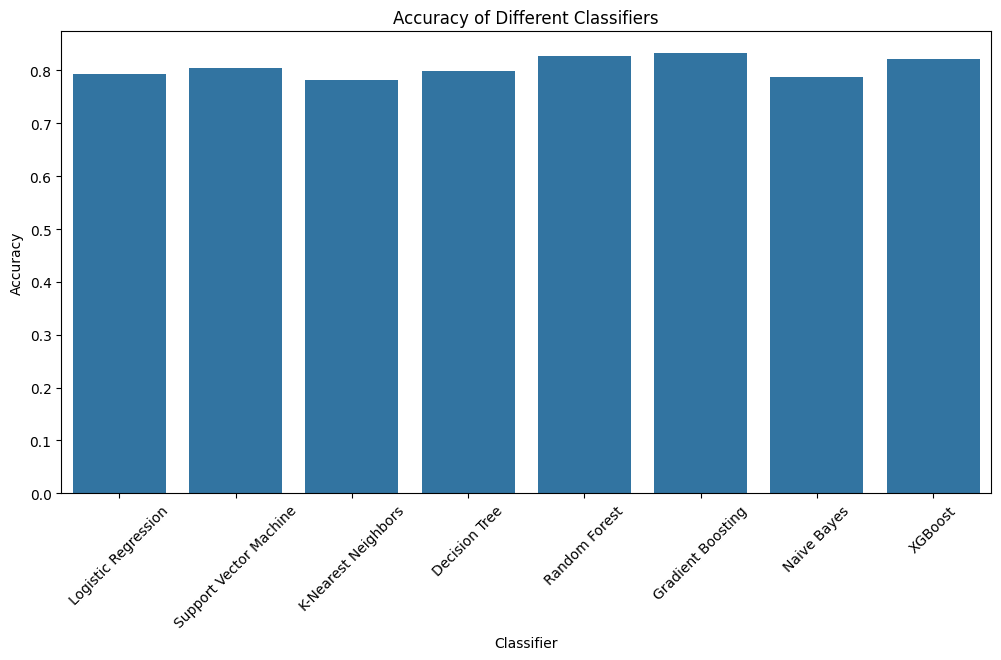

In [126]:
# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Accuracy of Different Classifiers")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

Choosing the gradient boosting algorithm since it has highest accuracy

In [127]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gb_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8324022346368715
Confusion Matrix:
 [[94 11]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



[[94 11]
 [19 55]]


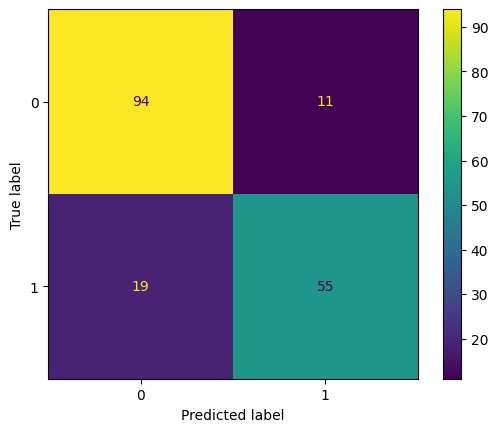

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [129]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [130]:
import joblib

# Save the model
joblib.dump(gb_clf, 'titanic_gb_model.pkl')

['titanic_gb_model.pkl']